<a href="https://colab.research.google.com/github/trucnguyen83/Injection-moulding/blob/master/CNN_Image_Injection_moulding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
pip install opencv-python

In [3]:
pip install keras

In [4]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

Using TensorFlow backend.


In [5]:
pip install wget

In [6]:
import wget
url = 'https://github.com/trucnguyen83/Injection-moulding/raw/master/All Image change.zip'
wget.download(url, 'All Image change.zip')


'All Image change.zip'

In [10]:
!unzip 'All Image change.zip'
#answer n to all the interaction boxes if questioned

#if encounter problem, delete all zip file on left panel, run the below line then re-do download and unzip
##!rm -rf 'All Image change'


Archive:  All Image change.zip
   creating: All Image change/
  inflating: All Image change/.DS_Store  
replace __MACOSX/All Image change/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
   creating: All Image change/Test/
   creating: All Image change/Train/
  inflating: All Image change/Test/Good - (89).jpg  
  inflating: All Image change/Test/Good - (66).jpg  
  inflating: All Image change/Test/Bad2 - (34).jpg  
  inflating: All Image change/Test/Good - (70).jpg  
  inflating: All Image change/Test/Good - (85).jpg  
  inflating: All Image change/Test/Bad2 - (38).jpg  
  inflating: All Image change/Test/Bad1 - (7).jpg  
  inflating: All Image change/Test/Good - (93).jpg  
  inflating: All Image change/Test/Bad4 - (8).jpg  
  inflating: All Image change/Test/Bad2 - (42).jpg  
  inflating: All Image change/Test/.DS_Store  
replace __MACOSX/All Image change/Test/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: All Image change/Test/Bad4 - (9).jpg  
  inflating: All 

In [11]:
#if unzip encounter problem, delete all zip file on left panel, run the below line then re-do download and unzip
##!rm -rf 'All Image change'

In [12]:
# Processing training data
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []       
train_labels = []
shape = (200,200)  
train_path = '/content/All Image change/Train'

for filename in os.listdir('/content/All Image change/Train'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split(' - ')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state = 1,test_size = 0.4)

In [13]:
# Processing testing data
# -> appending images in a list 'test_images'
# -> appending labels in a list 'test_labels'
# The test data contains labels as well also we are appending it to a list but we are not going to use it while training.

test_images = []
test_labels = []
shape = (200,200)
test_path = '/content/All Image change/Test'

for filename in os.listdir('/content/All Image change/Test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split(' - ')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
# Converting test_images to array
test_images = np.array(test_images)

In [14]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(6,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [15]:
# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten_1 (Flatten)          (None, 63480)            

In [16]:
# Training the model
history = model.fit(x_train,y_train,epochs=30,batch_size=10,validation_data=(x_val,y_val))

Train on 72 samples, validate on 49 samples
Epoch 1/30
72/72 [==============================] - 9s 129ms/step - loss: 3.7737 - acc: 0.1528 - val_loss: 2.0787 - val_acc: 0.1633
Epoch 2/30
72/72 [==============================] - 9s 124ms/step - loss: 3.3898 - acc: 0.4306 - val_loss: 5.2622 - val_acc: 0.3061
Epoch 3/30
72/72 [==============================] - 9s 123ms/step - loss: 3.4297 - acc: 0.1111 - val_loss: 2.0630 - val_acc: 0.1633
Epoch 4/30
72/72 [==============================] - 9s 123ms/step - loss: 2.2273 - acc: 0.2083 - val_loss: 1.6732 - val_acc: 0.1633
Epoch 5/30
72/72 [==============================] - 9s 121ms/step - loss: 2.1479 - acc: 0.2222 - val_loss: 2.0661 - val_acc: 0.3061
Epoch 6/30
72/72 [==============================] - 9s 121ms/step - loss: 1.9817 - acc: 0.2500 - val_loss: 2.1440 - val_acc: 0.3061
Epoch 7/30
72/72 [==============================] - 9s 121ms/step - loss: 3.3839 - acc: 0.3611 - val_loss: 2.6208 - val_acc: 0.3469
Epoch 8/30
72/72 [==============

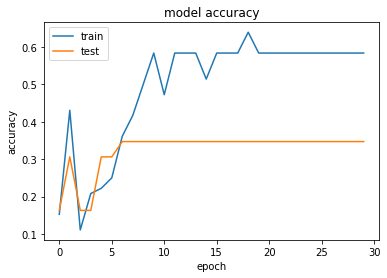

In [17]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

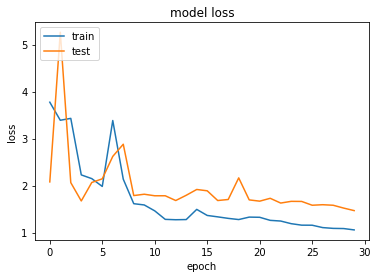

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

49/49 [==============================] - 1s 29ms/step
[1.4675950785072482, 0.3469387888908386]


[0 0 1 0 0 0]


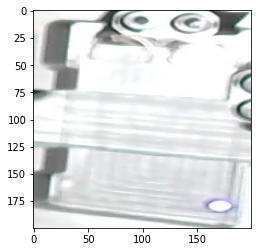

In [20]:
# Visualizing Training data
print(train_labels[1])
plt.imshow(train_images[1])